# Metrics

This notebook is a rough first draft for metric creation.

In [1]:
import cv2
from pathlib import Path
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data_directory = Path('../data/images/floorplan/output/')
files = [x for x in data_directory.glob('*.png')]

In [3]:
from mlgan.core.preprocessing import image_to_geodataframe
import networkx as nx

# Neigbour regions

In [4]:
def find_neighbouring_areas(gdf):
    buffer = 2 # add small buffer to ensure overlap.

    matching_ids = {}
    for i, row in gdf.iterrows():
        matching_id = gdf[~gdf.geometry.buffer(buffer).disjoint(row.geometry)].index
        matching_id = [x for x in matching_id if i != x]
        matching_ids[i] = matching_id
    
    return matching_ids

In [5]:
def create_graph(matching_ids, gdf):
    G = nx.Graph()
    edges = []
    for key, val in matching_ids.items():
        for _v in val:
            edges.append((key, _v))
    
    pos = {}
    for i, row in gdf.iterrows():
        pos[i] = [row.geometry.centroid.x, row.geometry.centroid.y]
        
    G.add_edges_from(edges)
    for x in G.nodes():
        coords = pos[x]
        G.nodes[x]['x'] = coords[0]
        G.nodes[x]['y'] = coords[1]
    return G

def get_coords(G):
    coords = {}
    for x in G.nodes(data=True):
        coords[x[0]] = [x[1]['x'], x[1]['y']]
    return coords

In [6]:
files

[WindowsPath('../data/images/floorplan/output/1001.png'),
 WindowsPath('../data/images/floorplan/output/1002.png'),
 WindowsPath('../data/images/floorplan/output/1003.png'),
 WindowsPath('../data/images/floorplan/output/1006.png'),
 WindowsPath('../data/images/floorplan/output/1007.png'),
 WindowsPath('../data/images/floorplan/output/1008.png'),
 WindowsPath('../data/images/floorplan/output/1009.png'),
 WindowsPath('../data/images/floorplan/output/1013.png'),
 WindowsPath('../data/images/floorplan/output/1014.png'),
 WindowsPath('../data/images/floorplan/output/1017.png'),
 WindowsPath('../data/images/floorplan/output/1018.png'),
 WindowsPath('../data/images/floorplan/output/1020.png'),
 WindowsPath('../data/images/floorplan/output/1023.png'),
 WindowsPath('../data/images/floorplan/output/1027.png'),
 WindowsPath('../data/images/floorplan/output/1028.png'),
 WindowsPath('../data/images/floorplan/output/1030.png'),
 WindowsPath('../data/images/floorplan/output/1037.png'),
 WindowsPath('

In [7]:
img = cv2.imread(str(files[11]))

In [8]:
connectivity = image_to_geodataframe(img)
results = find_neighbouring_areas(connectivity)
G = create_graph(results, connectivity)

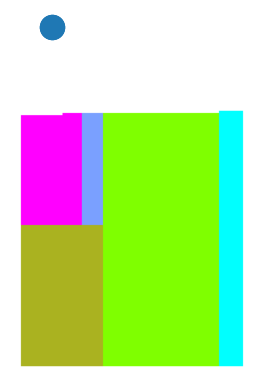

In [9]:
fig, ax = plt.subplots()
plt.imshow(img)
nx.draw(G, get_coords(G))

---
# Bar plot

In [10]:
import pandas as pd

<Axes: >

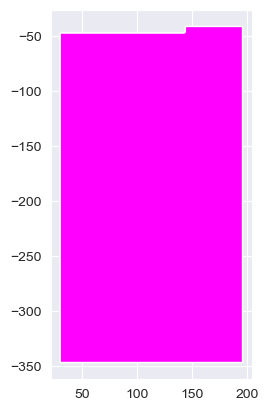

In [11]:
connectivity.plot(color=connectivity['colors'])

In [12]:
areas = connectivity[['category', 'colors']].copy()
areas['area'] = connectivity.geometry.area

In [13]:
areas

,category,colors,area
0,bathroom,"[1.0, 0.0, 1.0]",50112.5
1,restroom,"[1.0, 0.0, 1.0]",50112.5


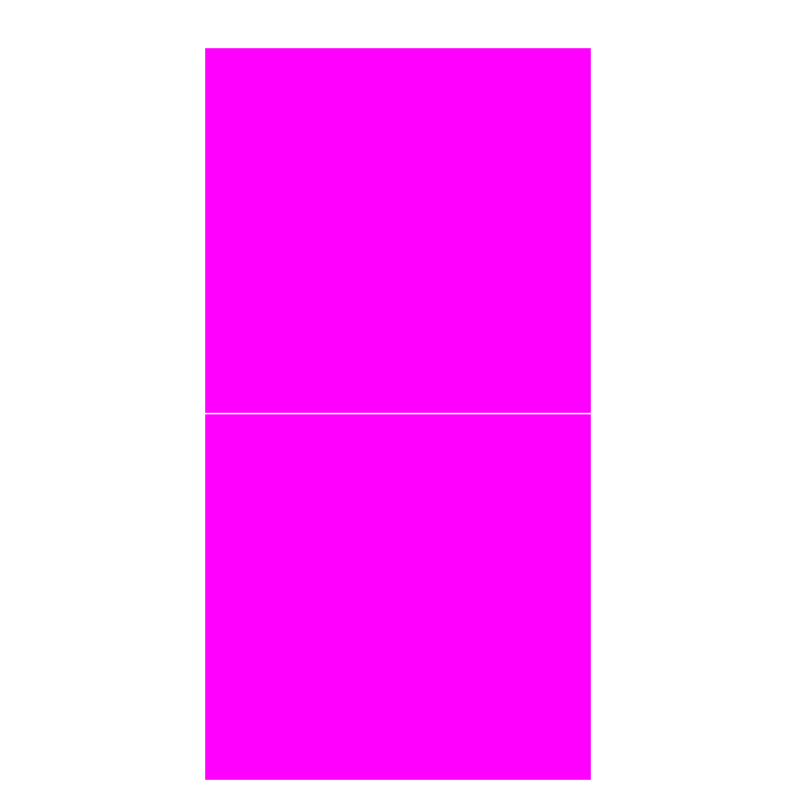

In [14]:
fig, ax = plt.subplots(figsize=(10, 10))
areas[['area']].T.plot.bar(ax=ax, stacked=True, color=areas['colors'], legend=False)
plt.axis("off");

----
# Skeletonize

In [15]:
from skimage.morphology import skeletonize

ModuleNotFoundError: No module named 'skimage'

In [ ]:
res = skeletonize(img)

In [ ]:
plt.imshow(img)

In [16]:
plt.imshow(res)

NameError: name 'res' is not defined